In [2]:
# In this line , We have imported all the packages that will be required further.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import os
import cv2
from scipy import ndimage, misc
from sklearn.datasets import fetch_mldata
from PIL import Image

In [3]:
# This is about getting the current directory path. 
# So, we are not required to chnage the path for dataset. It will automatically take the path for dataset.
path = os.getcwd() + "\\dataset-1(logo_as_tiny_random)"

In [4]:
# In this line of code, It will read the Images file from dataset and will resize each image file.
# For resizing the image file, we are considering converting to 784 pixels each file, so that we can reduce the computation time.

images = []
for root, dirnames, filenames in os.walk(path):
    for filename in filenames:
        filepath = os.path.join(root, filename)
        image = ndimage.imread(filepath, mode="1")
        image_resized = misc.imresize(image, (28,28))
        image_resized = np.reshape(image_resized, (np.product(image_resized.shape)))
        images.append(image_resized) 

C:\Users\asus\Anaconda3\Lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
C:\Users\asus\Anaconda3\Lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


In [5]:
# To check the image size
images[1].shape

(784,)

In [52]:
# For counting total number of Images in Folder
count = 0
for i in images:
    count+=1

In [53]:
count

375

In [54]:
# TO storing the images pixels in a list and then converting the list into array.
Xlist=[]
for i in range(count):
    Xlist.append(list(np.asarray(images[i])))

In [55]:
X = np.asarray(Xlist)

In [56]:
#some_digit = X[17]
#some_digit_image = some_digit.reshape(28,28)
#plt.imshow(some_digit_image)
#plt.show()

In [57]:
#X[0].shape

In [58]:
# It will automatically read the path of CSV file.
csv_path = os.getcwd() + "\\usf as tiny part.csv"
csv = pd.read_csv(csv_path)

In [59]:
# It will take each image file's label(USF / Non USF) and store into a List.
y = []
for i in range(count):
    x =csv['Label'][i]
    y.append(x)

In [60]:
# It will convert the list into array.
y = np.asarray(y)

In [61]:
# To check the type of X and Y.
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [62]:
# To check the shape of X & Y.
X.shape,y.shape

((375, 784), (375,))

In [63]:
# To divide the dataset into train and test.
# For testing we have taken 20% of data.
train  = int(count*0.2)
train

75

In [64]:
# Dividing the original dataset into training and testing datset.
X_train, X_test, y_train, y_test = X[:count-test], X[count-test:],y[:count-test], y[count-test:]

In [65]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [66]:
X_train.shape,y_train.shape

((300, 784), (300,))

In [67]:
# For shuffling index of train dataset.
shuffle_index = np.random.permutation(count-test)

In [68]:
# Printing shuffle index, length of it and each and every shufle index.
print(type(shuffle_index), len(shuffle_index),shuffle_index)

<class 'numpy.ndarray'> 300 [245  31 277 233 281 297 136 135  33 185 175 201 238  71  26 106  11 247
 178 189  45 191 131  61 270 159 228  93 209  36 129 160 284 268 168 157
 249   5  41 156 269 111  34 110 177 254 120 118 181 299  32  99 152  78
  53 123 132 290 248  29 165 256 199 266 218 226  94  18 261  96 292 206
 265  51 100 186 109 279 198  77 225  73  67 139  86 190 149 271  98 113
 112 239  97 251 148 144 188  72 137 213   3  19  74  21 263 240 104  14
 170 259 180  57  84 107 216 187 204 184   8 219  28 229  83 162  25 293
 298 246 200   6  30 227  52  79   1 273 207 166 230 212 291 264 163 151
  66 147 220  55  64 211  69 169  89   9 272 195  35 286  65  16 237 182
 174 232  38 173 176  85 194 105  42 253 289 235 282 143 193 294 146  43
  90 192 125 119  63 124 280  48  68 276 154 243 262 287 153 134  58 231
  10 210 267  88 126  87 150 158  70  75 222  12 145  49 296 203 221 103
 244 283 114 172 108  80 275  47 164 288  20  13  40 217 115 214 102 250
  24  27 197 133  60 20

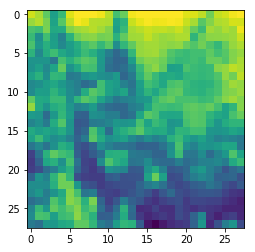

In [69]:
# For showing a single imgae file after reshaping.
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image)
plt.show()

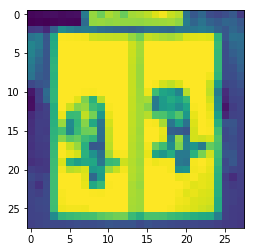

In [70]:
# For shuffling X_Train and Y_Train.
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image)
plt.show()

In [71]:
# For importing creating Stochastic Gradient Descent.
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
type(sgd)

sklearn.linear_model.stochastic_gradient.SGDClassifier

In [72]:
y_test[0:10]

array(['Non-USF', 'Non-USF', 'USF', 'Non-USF', 'USF', 'Non-USF', 'USF',
       'Non-USF', 'USF', 'Non-USF'], dtype='<U7')

In [73]:
# Trying to fit the data with the sgd model and predicting using X_test data..
sgd.fit(X_train, y_train)
prediction = sgd.predict(X_test)

C:\Users\asus\Anaconda3\Lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [74]:
# importing accuracy score
from sklearn.metrics import accuracy_score

In [75]:
# For getting the accuracy from the model.
total =0
total = accuracy_score(y_test, prediction)

In [76]:
print(total)

0.7066666666666667


In [48]:
# For importing cross validation score
from sklearn.model_selection import cross_val_score

In [74]:
# For calculating cross val score by giving CV=3.
cross_val_score(sgd, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\asus\Anaconda3\Lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\asus\Anaconda3\Lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\asus\Anaconda3\Lib\site-p

array([0.5049505 , 0.48      , 0.48484848])

In [75]:
# For importing cross validation prediction.
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd, X_train, y_train, cv=3)

C:\Users\asus\Anaconda3\Lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\asus\Anaconda3\Lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\asus\Anaconda3\Lib\site-p

In [76]:
# For importing  confusion matrix and creating confusion matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred) # actual vs predicted

array([[58, 91],
       [62, 89]], dtype=int64)